In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#data preparation
#1. Loading dataset
df = pd.read_csv("framingham.csv")
df.drop(['education'], inplace = True, axis = 1) #applied on columns(axis=1 means columns)
df.rename(columns = {'male':'sex_male'}, inplace = True)

In [ ]:
#Taking a look at the data
df.head()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
rows, columns = df.shape

print("The rows are: ", rows)
print("The columns are: ", columns)

The rows are:  4240
The columns are:  15


In [ ]:
#2. Handling missing values
df.dropna(axis=0, inplace=True) #works on rows; we are dropping rows with missing values
print(df.TenYearCHD.value_counts())
df

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
#splitting the dataset into test and train sets

X = np.asarray(df[[ 'age', 'sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose' ]])
y = np.asarray(df[ 'TenYearCHD' ])

X = preprocessing.StandardScaler().fit(X).transform(X) 
#This scales the features in X to have a mean of 0 and 
#standard deviation of 1 using StandardScaler. 
#Scaling is important for many machine learning models, 
#especially when the features have different units or magnitudes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4) #Test set (30% of data, X_test and y_test)
#random_state=4 ensures the split is reproducible

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


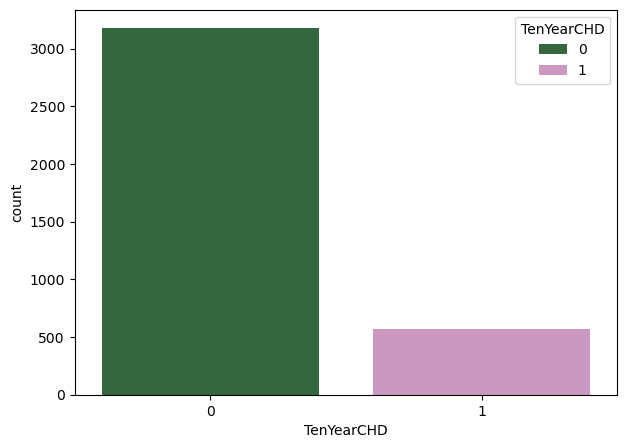

In [ ]:
#Exploratory Data Analysis of Heart Disease dataset

plt.figure(figsize=(7, 5))
sns.countplot(x = 'TenYearCHD', hue = 'TenYearCHD', data = df, palette="cubehelix", legend = True)
plt.show()

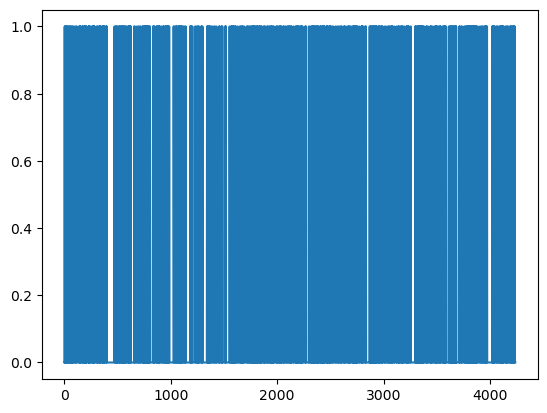

In [ ]:
#0 = not affected, 1 = affected

laste = df['TenYearCHD'].plot()
plt.show(laste)

#blue bars indicate the absence of heart disease
#white space indicate the presence of heart disease

In [ ]:
#Fitting logistic regression model for heart disease prediction
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
#Evaluating Logistic Regression Model
print("Accuracy of the model is: ", accuracy_score(y_test, y_pred))

Accuracy of the model is:  0.8490230905861457


The details for the confusion matrix is: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



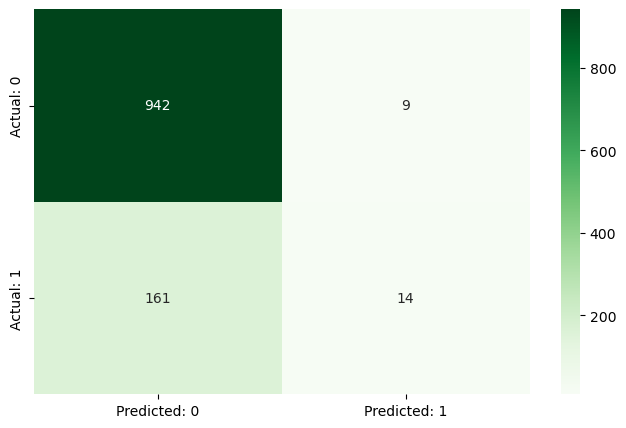

In [ ]:
#Confusion matrix 
#is a performance evaluation tool used to assess the accuracy of a classification model

print("The details for the confusion matrix is: ")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
confs_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

plt.figure(figsize = (8, 5))
sns.heatmap(confs_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()